# Loan_Prediction_Project

Name: Vaibhav Tayade

contact: 808797001

Email id: vaibhav_t29@rediffmail.com

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Importing Data File

In [2]:
# creating dataframe for EDA
df_asitis = pd.read_csv('loan_application_status.csv')

In [3]:
# creating dataframe for further proceedings:
df = pd.read_csv('loan_application_status.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# checking details of the dataset:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Observation:

Observation:
    we can see in the above describtion table of dataframe, in  columns like ApplicatIncome, CoapplicantIncome, LoanAmount have Mean higher than the Median which indicates presence of Outliers in the dataset.

In [5]:
# checking presence of null values in each column.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation: We can clearly see the presence of null values in the datasets.

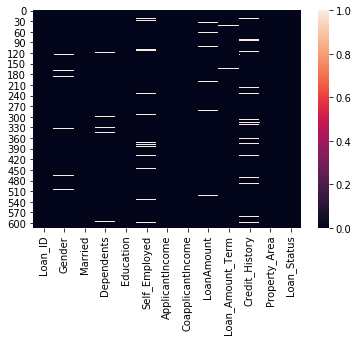

In [6]:
# plotting missing values:
sns.heatmap(df.isnull())

Observation:
    
Note: we need to fill these null values with mean or median incase of numerical datasets or Mode values in case of Categorical datasets.

In [7]:
# checking mode values of this categorical columns:

print(df['Gender'].mode())
print(df['Married'].mode())
print(df['Dependents'].mode())
print(df['Self_Employed'].mode())
print(df['Loan_Amount_Term'].mode())
print(df['Credit_History'].mode())


0    Male
dtype: object
0    Yes
dtype: object
0    0
dtype: object
0    No
dtype: object
0    360.0
dtype: float64
0    1.0
dtype: float64


In [8]:
# checking mean values of this numerical column.
print(df['LoanAmount'].mean())

146.41216216216216


In [9]:
# replacing Null values with Mode values in categorical type of column and with mean value in Numerical type of column.

data = [df]

for dt in data:
    dt['Gender'].fillna('Male', inplace=True)
    dt['Married'].fillna('Yes', inplace=True)
    dt['Dependents'].fillna('0', inplace=True)
    dt['Self_Employed'].fillna('No', inplace=True)
    dt['LoanAmount'].fillna(146.41, inplace=True)
    dt['Loan_Amount_Term'].fillna(360.0, inplace=True)
    dt['Credit_History'].fillna(1.0, inplace=True)

In [10]:
# checking presence of null values again in each column.
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Observation: Now we can see there's no null values present in the datasets, all null values have been filled with values.

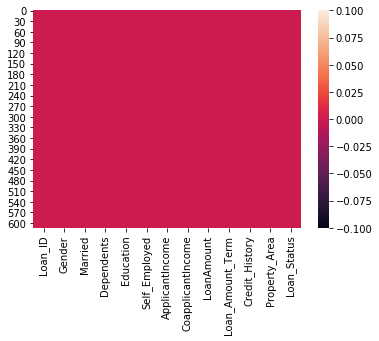

In [11]:
# plotting missing values again with heatmap:
sns.heatmap(df.isnull())

Observation: There are no Null values present in the dataset.

# UNIVARIATE ANALYSIS:

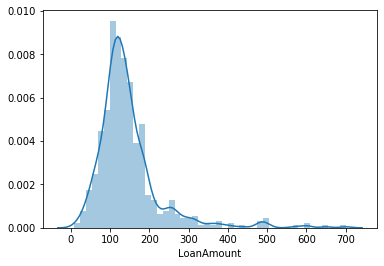

In [12]:
# distplot 1 >>>
sns.distplot(df['LoanAmount'])

Observation:   We can see presence of skewness in the above LoanAmount Column.

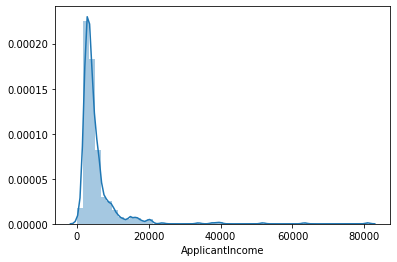

In [13]:
# distplot 2 >>>
sns.distplot(df['ApplicantIncome'])

Observation:  We can see presence of skewness in the above ApplicantIncome Column.

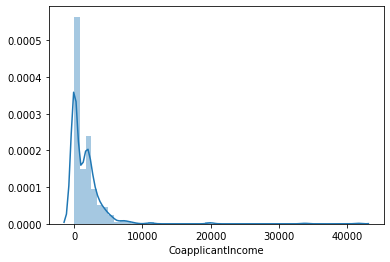

In [14]:
# distplot 3 >>>
sns.distplot(df['CoapplicantIncome'])

Observation:  We can see presence of skewness in the above CopplicantIncome Column.

In [15]:
# checking amount of skewness in all columns::
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726604
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Observation:: We can see amount of skewness in LoanAmount column, ApplicantIncome column and Coapplicant Income column.

In [16]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
# creating a dataframe of true numerical column for further analysis:
df_1 = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
df_1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.41,360.0,1.0
1,4583,1508.0,128.00,360.0,1.0
2,3000,0.0,66.00,360.0,1.0
3,2583,2358.0,120.00,360.0,1.0
4,6000,0.0,141.00,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.00,360.0,1.0
610,4106,0.0,40.00,180.0,1.0
611,8072,240.0,253.00,360.0,1.0
612,7583,0.0,187.00,360.0,1.0


# PLOTTING OUTLIERS USING BOXPLOT:

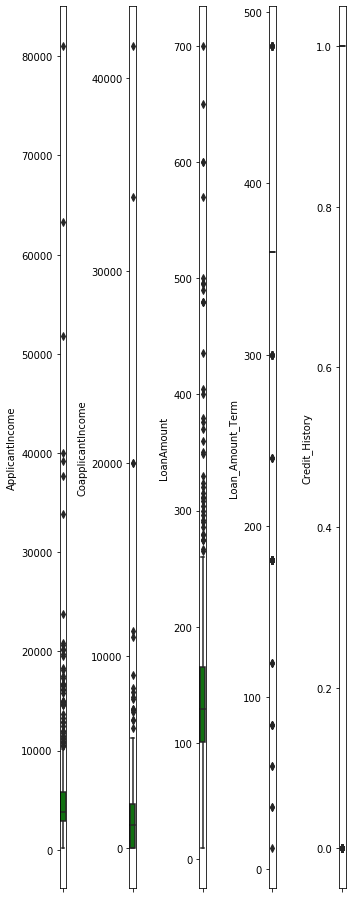

In [18]:
column_list = df_1.columns.values
ncol=5
nrows=2

plt.figure(figsize=(ncol,5*ncol))
for i in range(0, len(column_list)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df_1[column_list[i]],color='green',orient='v')
    plt.tight_layout()

Note: 'Loan_Amount_Term', 'Credit_History' columns are actually categorical type of datasets present in neumerical form.

Observation:
    We can see presence of outliers in all columns above, i.e. 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'.

# BIVARIATE ANALYSIS:

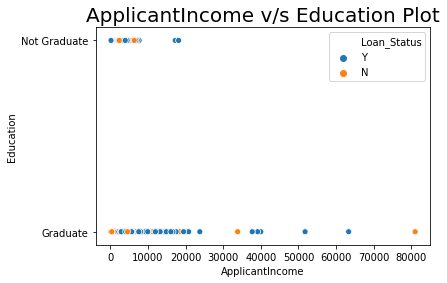

In [19]:
plt.title('ApplicantIncome v/s Education Plot', fontsize = 20)
sns.scatterplot(df_asitis['ApplicantIncome'], df_asitis['Education'], hue = df_asitis['Loan_Status'])

Observation: From the above scatter plot we can see that, Graduate people have more Income and have more approved loan status while NonGraduate people have less income and have less approved loan status.

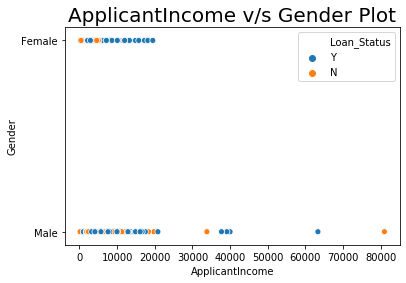

In [20]:
plt.title('ApplicantIncome v/s Gender Plot', fontsize = 20)
sns.scatterplot(df_asitis['ApplicantIncome'], df_asitis['Gender'], hue = df_asitis['Loan_Status'])

Observation: From the above scatter plot we can see that, Male gender have more income and have more loan status approved cases while Female gender have less income and have less loan status approved cases.

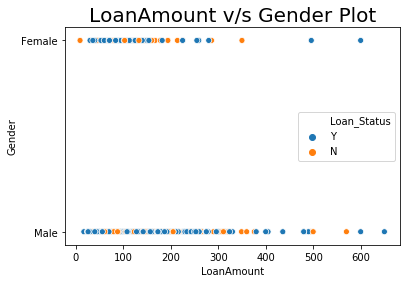

In [21]:
plt.title('LoanAmount v/s Gender Plot', fontsize = 20)
sns.scatterplot(df_asitis['LoanAmount'], df_asitis['Gender'], hue = df_asitis['Loan_Status'])

Observation:
    We can see that in above scatter plot, Male have more Loan Amount and have also more loan status approved cases while Female have less loan Amount with respect to Male and also have less loan_Status approved cases.

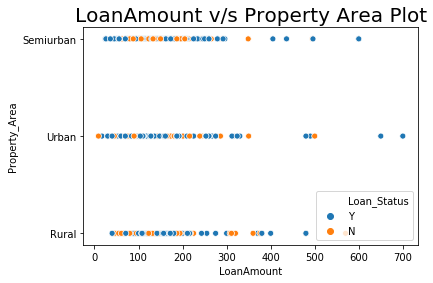

In [22]:
plt.title('LoanAmount v/s Property Area Plot', fontsize = 20)
sns.scatterplot(df_asitis['LoanAmount'], df_asitis['Property_Area'], hue = df_asitis['Loan_Status'])

Observation:
    We can see that in above scatter plot, Urban area have maximum loan amount and maximum loan_status approved cases, then Semiurban Area has second maximum loan amount and loan status approved cases while Rural areas have least loan amount and least number of loan Status approved cases.

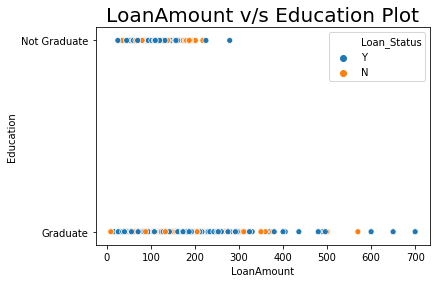

In [23]:
plt.title('LoanAmount v/s Education Plot', fontsize = 20)
sns.scatterplot(df_asitis['LoanAmount'], df_asitis['Education'], hue = df_asitis['Loan_Status'])

Observation:
    We can see that in above scatter plot Graduate people have maximum LoanAmount also have maximum number of Loan Status Approved cases while Non Graduate people have second least LoanAmount and also have least number of Loan status Aproved cases.

# ENCODING THE CATEGORICAL DATASET:

In [24]:
LE = LabelEncoder()


df['Gender'] = LE.fit_transform(df['Gender'])
df['Married'] = LE.fit_transform(df['Married'])
df['Dependents'] = LE.fit_transform(df['Dependents'])
df['Education'] = LE.fit_transform(df['Education'])
df['Self_Employed'] = LE.fit_transform(df['Self_Employed'])
df['Loan_Amount_Term'] = LE.fit_transform(df['Loan_Amount_Term'])
df['Credit_History'] = LE.fit_transform(df['Credit_History'])
df['Property_Area'] = LE.fit_transform(df['Property_Area'])
df['Loan_Status'] = LE.fit_transform(df['Loan_Status'])

In [25]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412085,7.667752,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,1.109224,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,8.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,8.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,8.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,9.000000,1.000000,2.000000,1.000000


# CHECKING CORRELATION MATRIX:

In [26]:
dfcor = df.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.065494,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.082642,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.096377,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.076414,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.029184,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.038808,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187829,-0.052472,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187829,1.000000,0.037500,-0.001430,-0.044776,-0.036416
Loan_Amount_Term,-0.065494,-0.082642,-0.096377,-0.076414,-0.029184,-0.038808,-0.052472,0.037500,1.000000,-0.002379,-0.086578,-0.005679
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001430,-0.002379,1.000000,0.001963,0.540556


# PLOTTING CORRELATION MATRIX:

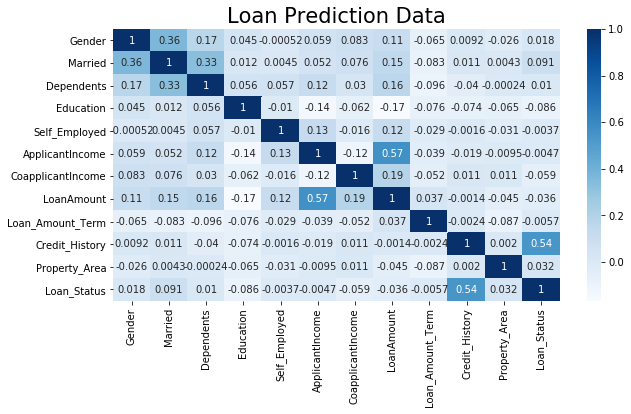

In [27]:
plt.figure(figsize=(10,5))
plt.title('Loan Prediction Data', fontsize = 21)

sns.heatmap(dfcor,cmap='Blues', annot=True)

OBSERVATION:

Most of the columns are negatively correlated with Loan_Status column.
ApplicatIncome column is -0.0047 points negatively coorelated with Loan_Status column.
Coapplicantincome column is -0.059 points negatively coorelated with Loan_Status column.
LoanAmount column is -0.036 points negatively coorelated with Loan_Status column.

# ANALYSING PAIRPLOT:

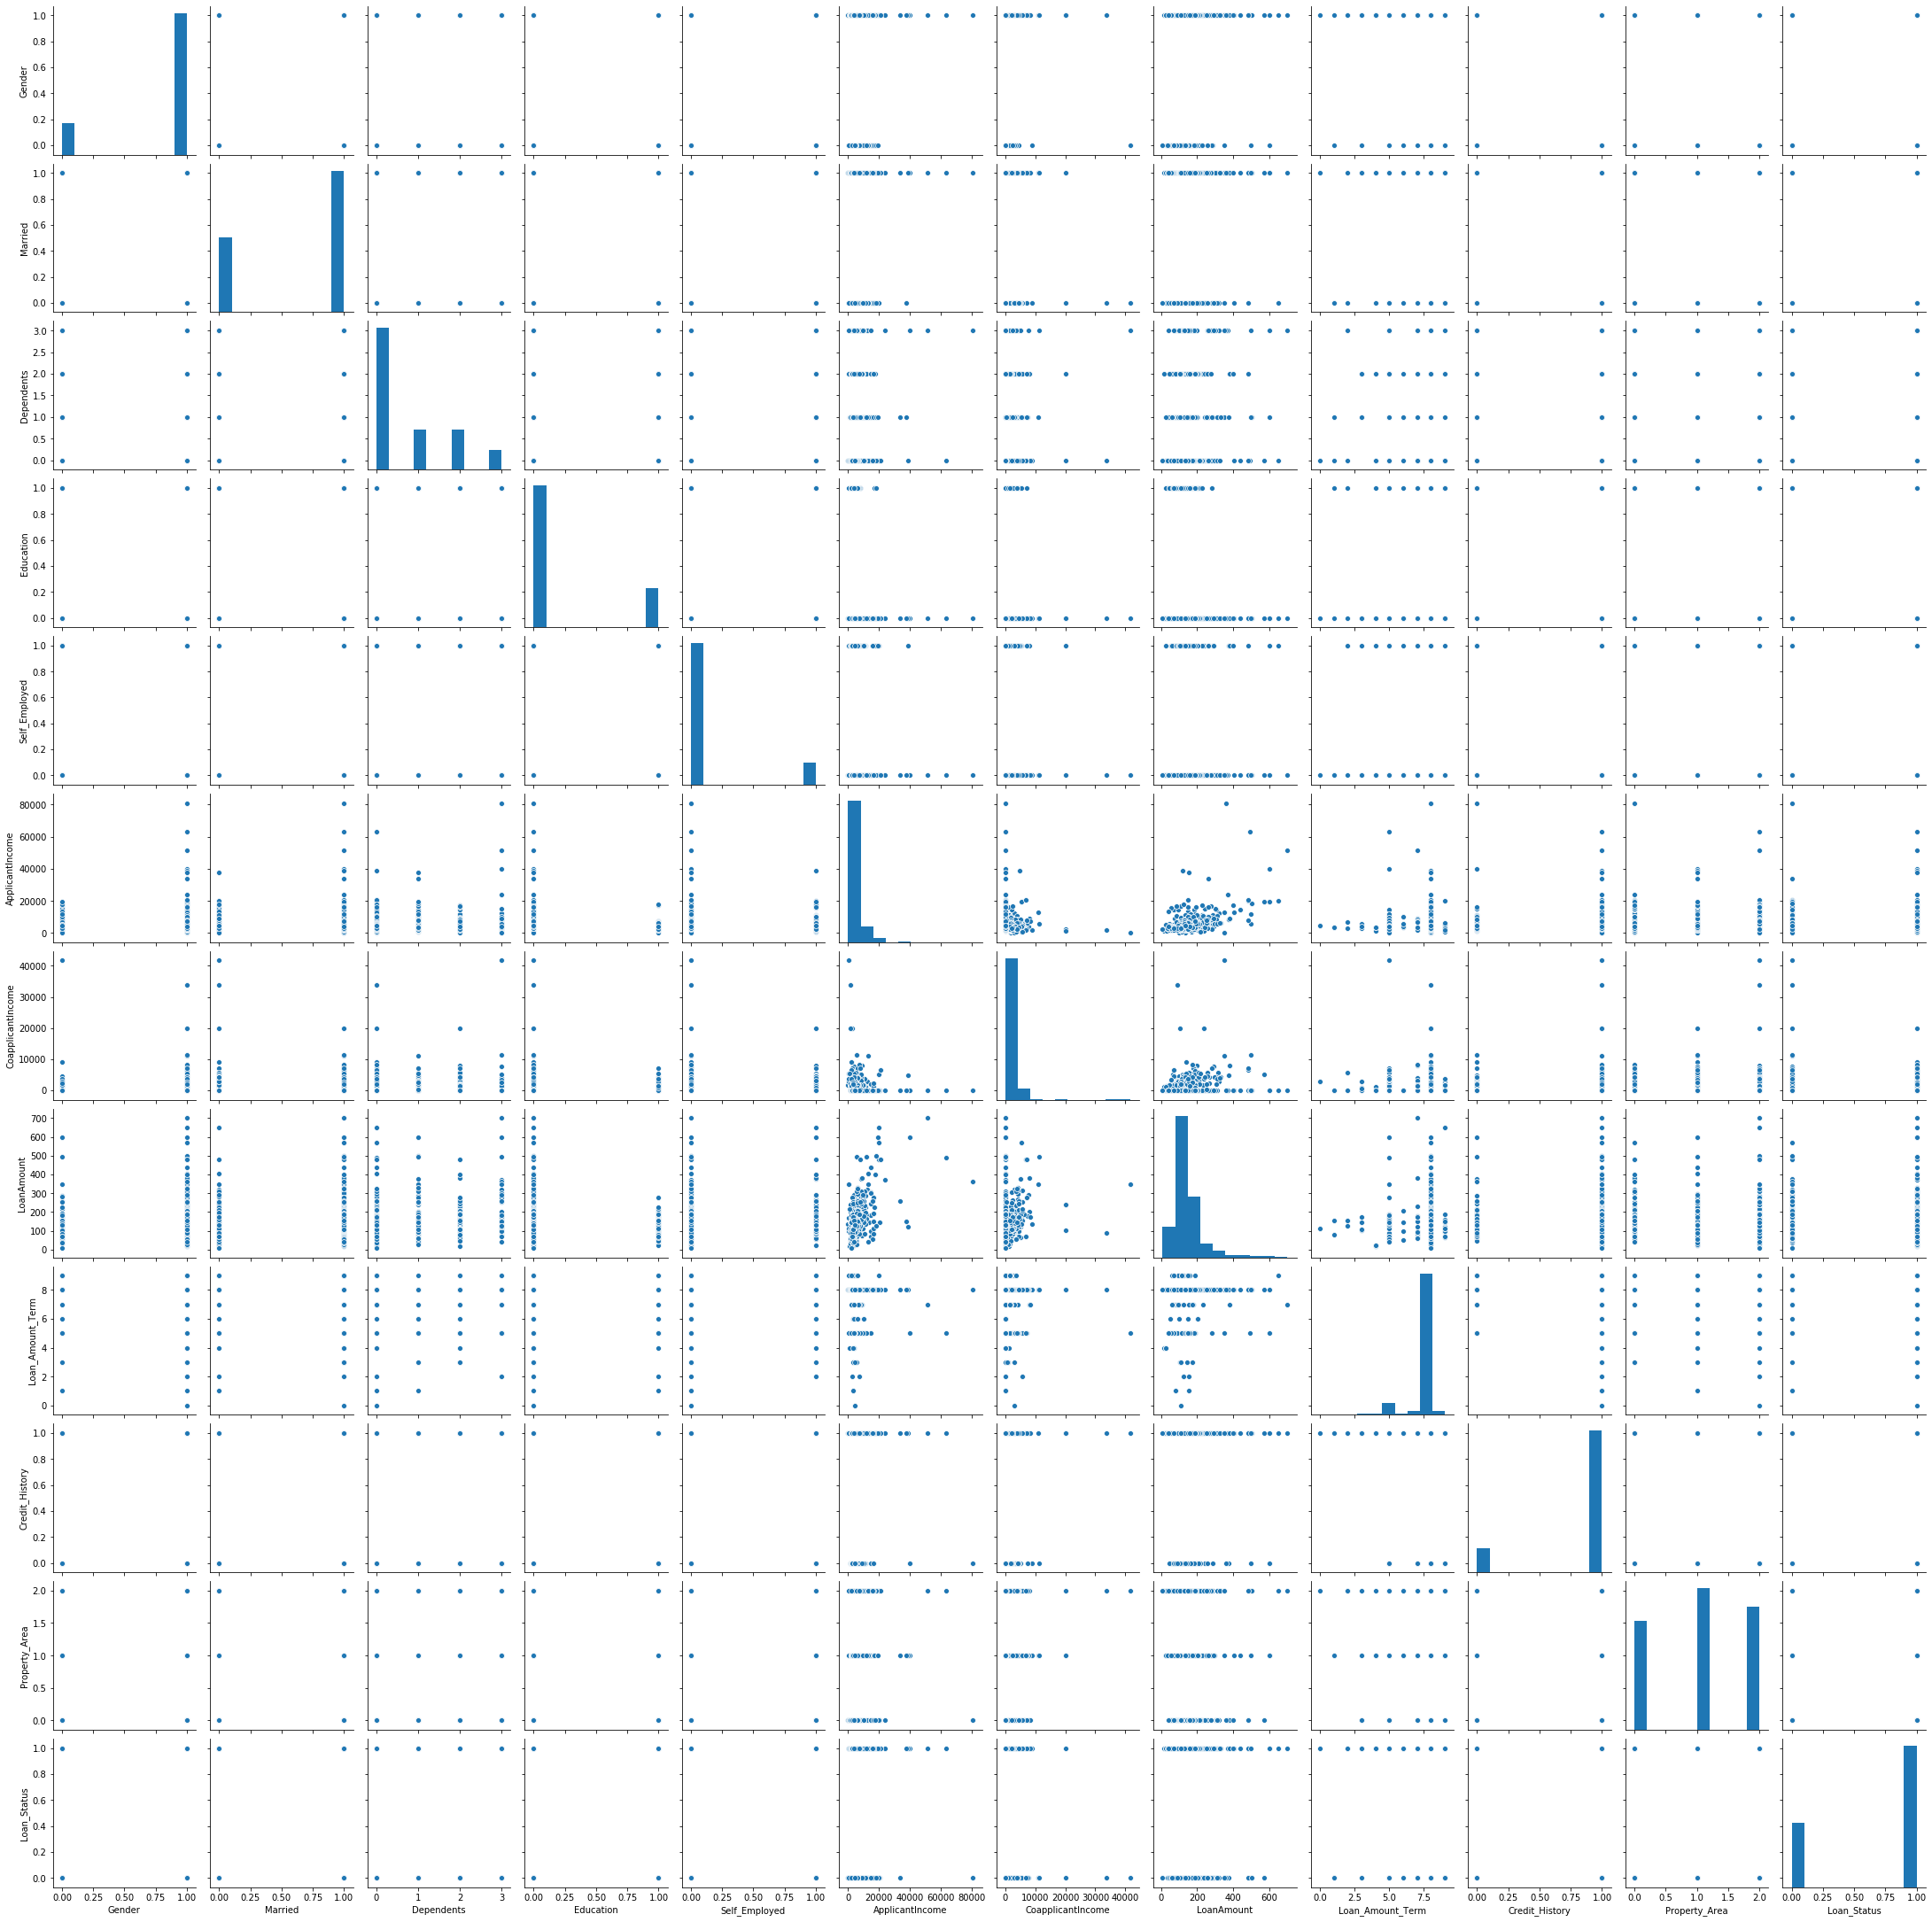

In [28]:
# Plotting pairplot of dataframe:
sns.pairplot(df)

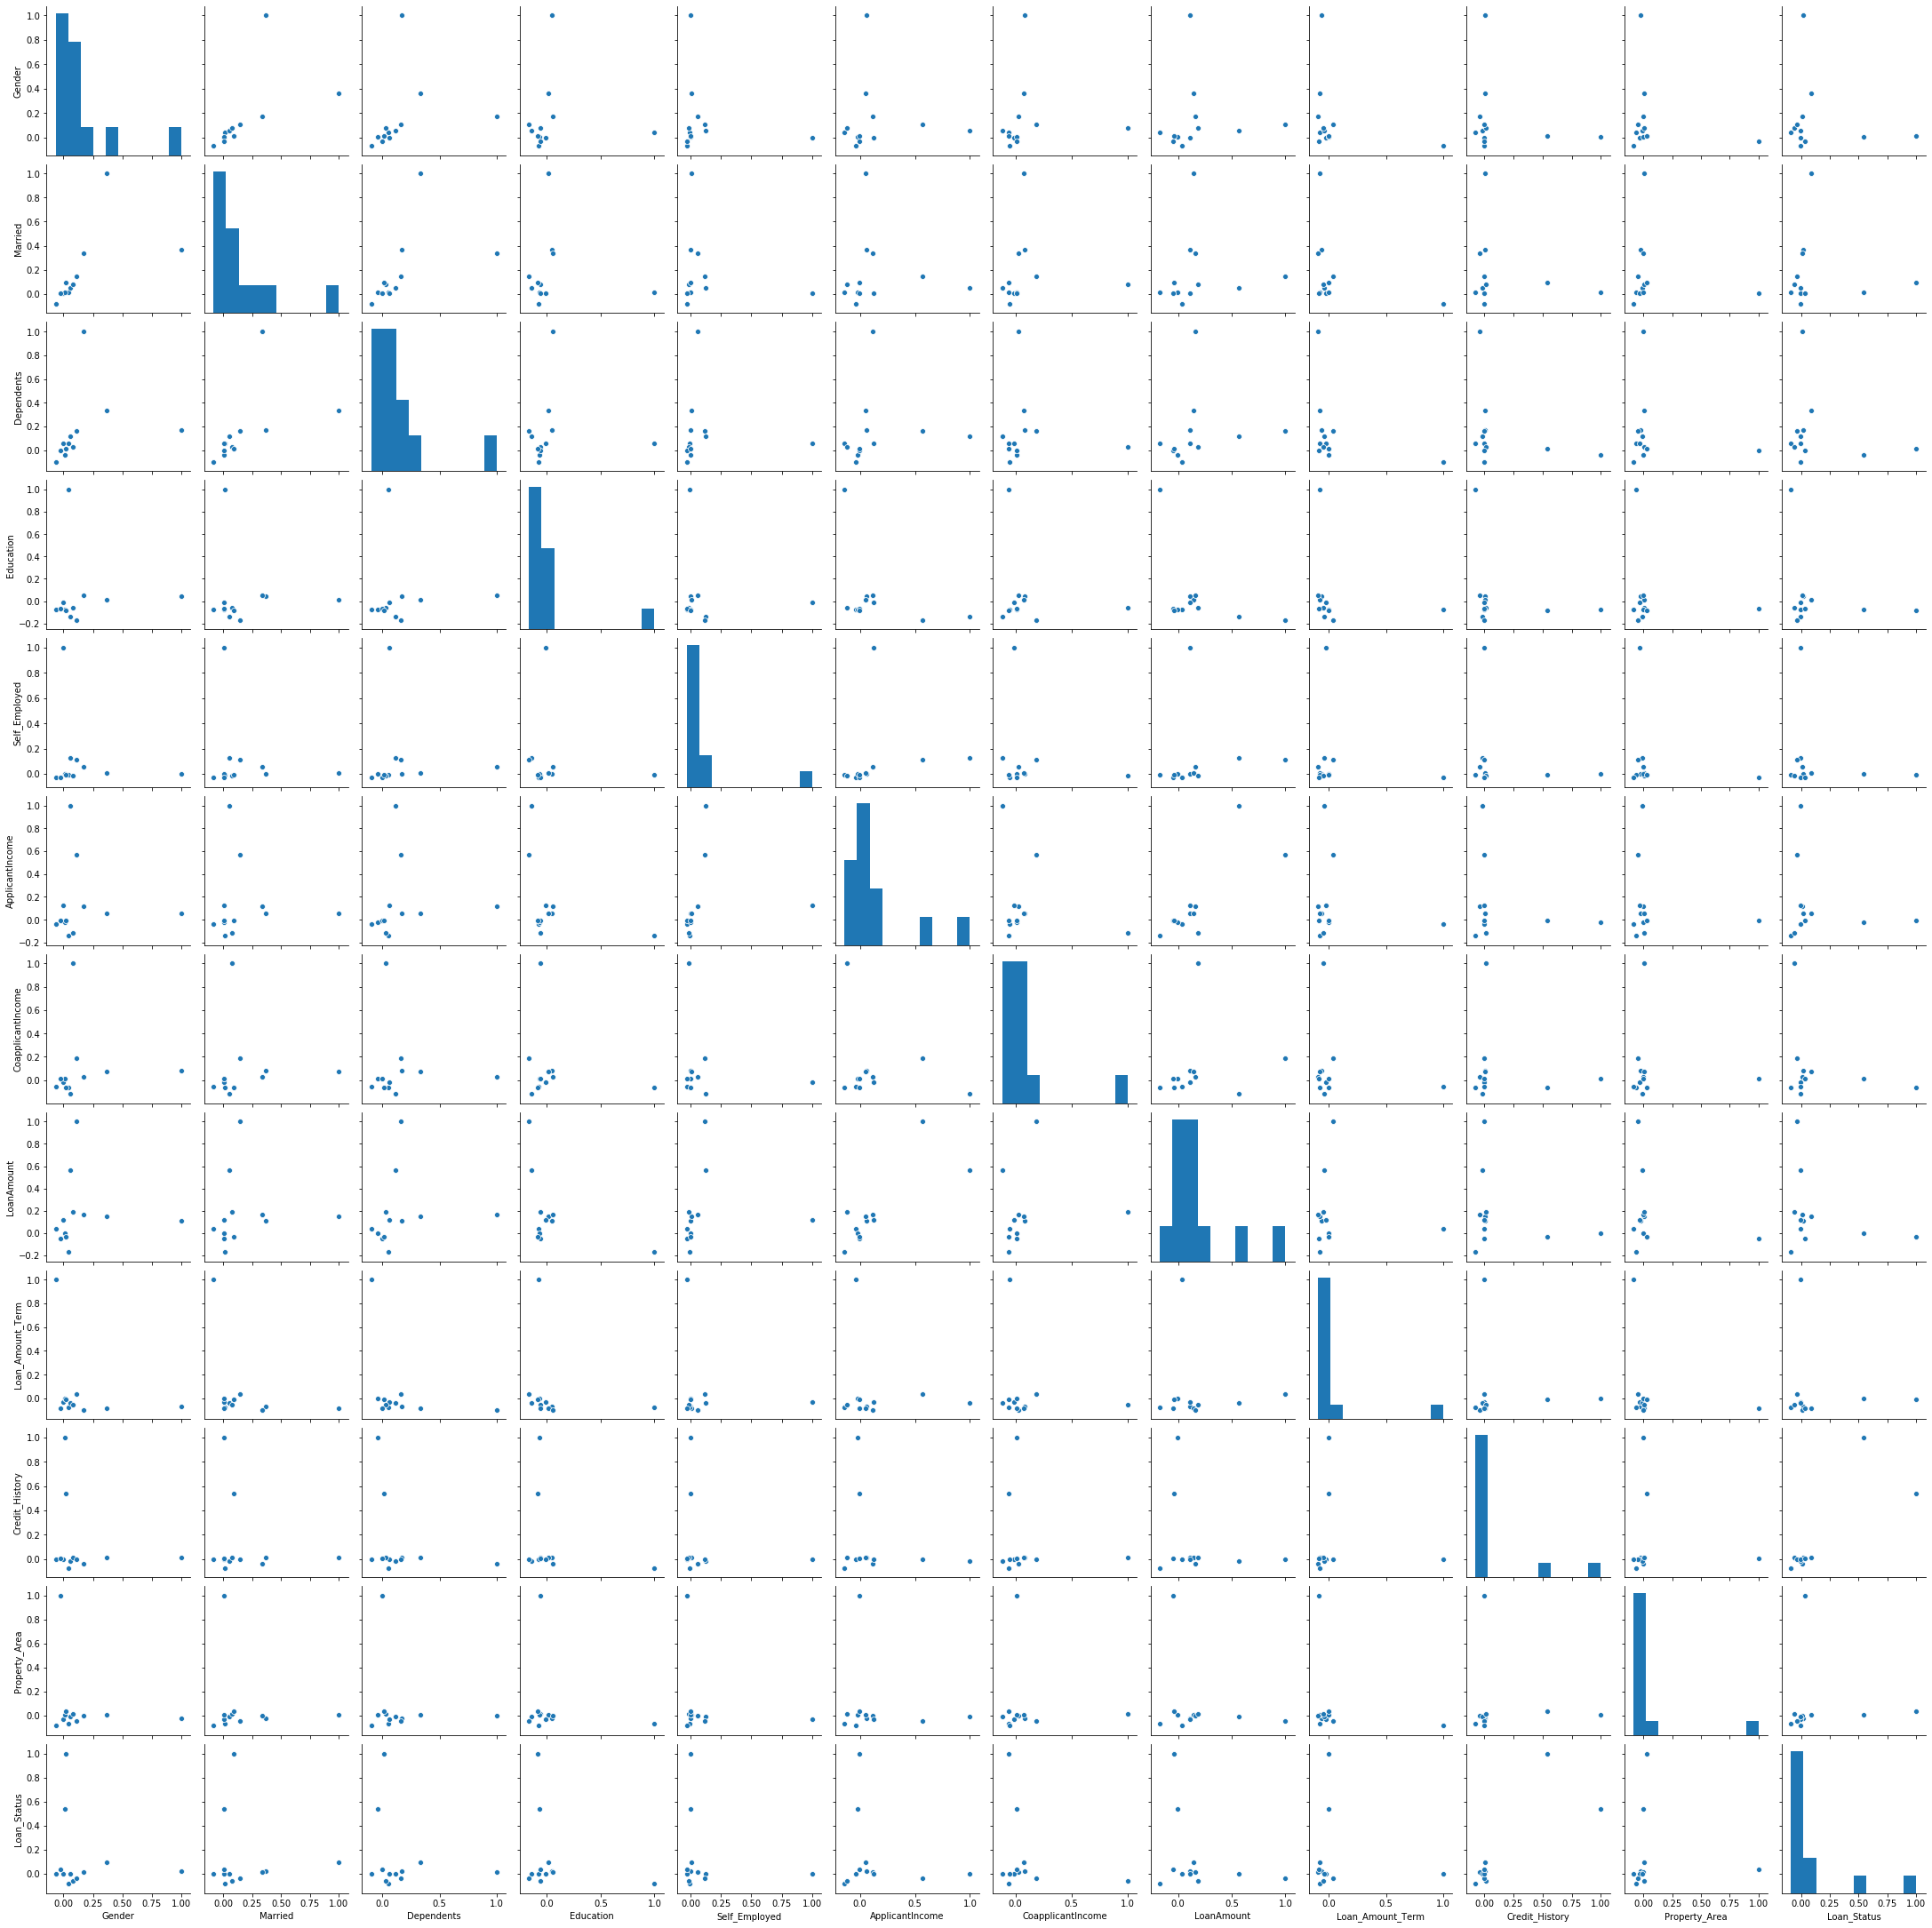

In [29]:
sns.pairplot(dfcor)

Observations::
Most of the columns are negatively correlated with Loan_Status column.
ApplicatIncome, Coapplicantincome, LoanAmount columns are negatively coorelated with Loan_Status column.
 

In [30]:
#checking datatypes:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int32
Loan_Status            int32
dtype: object

In [31]:
# checking column headings
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Note: Loan_ID columns is just a ID column which doesn't hold any specific data value, we can drop that column.

In [32]:
# creating new dataframe without 'Loan_ID' column:
df = df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

In [33]:
# checking datatypes:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int32
Loan_Status            int32
dtype: object

Observation: All datasets in every column is now converted into numerical data types for further analysis.

# REMOVING OUTLIERS:

In [34]:
# removing outliers with the help of zscore methods.
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [35]:
threshold = 3
print(np.where(z>threshold))

#creating new dataset without outliers and skewness
df_new = df[(z<3).all(axis=1)]
df_new

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.41,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.00,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.00,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.00,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.00,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.00,8,1,0,1
610,1,1,3,0,0,4106,0.0,40.00,5,1,0,1
611,1,1,1,0,0,8072,240.0,253.00,8,1,2,1
612,1,1,2,0,0,7583,0.0,187.00,8,1,2,1


# Checking DataLoss:

In [36]:
print(((df.shape[0]-df_new.shape[0])/df.shape[0]*100))

6.026058631921824


Observation: After removing outliers we are almost lossing 6.02 % of data, which is very much fine.

In [76]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113137
Loan_Amount_Term    -2.818252
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Observation: We can see skewness has been reduced drastically in columns like ApplicantIncome, CoapplicantIncome and LoanAmount columns, skewness cannot be removed completely from the dataset, because it also holds the internal property of the dataset.

# Creating X, Y Dataset:

In [37]:
# creating x,y dataset for further model building.
x = df_new.iloc[:,0:11]
y = df_new.iloc[:,-1]

In [38]:
x.shape

(577, 11)

In [39]:
y.shape

(577,)

In [40]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# SCALING THE DATASET:

In [41]:
#Scaling the dataset::
sc = StandardScaler()
x_scaled= sc.fit_transform(x)
columnslist = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

X = pd.DataFrame(x_scaled, columns = columnslist)


CHECKING BALANCING OF DATASET IN TARGET COLUMN:

In [42]:
#Before Balancing the dataset

y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

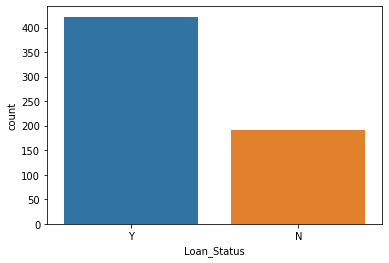

In [43]:
#plotting the imbalanced dataset:

import seaborn as sns
ax = sns.countplot(x='Loan_Status', data = df_asitis)


Observation: We can see that in our target column, we are having imbalanced dataset, which is not good for model making. we need to balance the dataset.

# BALANCING THE DATASET:

In [44]:
# balancing the dataset with over sampling technique.
SM = SMOTE()
x_over, y_over = SM.fit_resample(X, y)

In [45]:
x_over.shape

(796, 11)

In [46]:
y_over.shape

(796,)

In [47]:
#After Balancing the dataset

y_over.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

OBSERVATION:  We have balanced the dataset in target column by oversampling technique.

# CREATING TRAIN TEST DATASET:

In [48]:
#creating train test dataset from the x and y part inorder to start model making.

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=.20, random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(636, 11)
(636,)
(160, 11)
(160,)


# LOGISTIC REGRESSION METHOD:

In [49]:
# Logistic Regression:

lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
print('accuracy score - ', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

accuracy score -  0.725
[[39 39]
 [ 5 77]]
              precision    recall  f1-score   support

           0       0.89      0.50      0.64        78
           1       0.66      0.94      0.78        82

    accuracy                           0.73       160
   macro avg       0.78      0.72      0.71       160
weighted avg       0.77      0.72      0.71       160



Checking over fitting of the model using cross validation score:

In [50]:
print(cross_val_score(lg, x_over, y_over, cv=5).mean())

0.7160849056603773


# GAUSSIAN NB METHOD:

In [51]:
#As there are two target categories present in target column i.e. 'Loan_Status' column.
# We can use GaussianNB algorithm for model making.

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predg = gnb.predict(x_test)
print(accuracy_score(y_test, predg))
print(confusion_matrix(y_test, predg))
print(classification_report(y_test, predg))

0.7
[[32 46]
 [ 2 80]]
              precision    recall  f1-score   support

           0       0.94      0.41      0.57        78
           1       0.63      0.98      0.77        82

    accuracy                           0.70       160
   macro avg       0.79      0.69      0.67       160
weighted avg       0.78      0.70      0.67       160



Checking over fitting of the model using cross validation score:

In [52]:
print(cross_val_score(gnb, x_over, y_over, cv=5).mean())

0.707311320754717


# DECISION TREE CLASSIFIER METHOD:

In [53]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.75625
[[64 14]
 [25 57]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        78
           1       0.80      0.70      0.75        82

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



Checking over fitting of the model using cross validation score:

In [54]:
print(cross_val_score(dtc, x_over, y_over, cv=5).mean())

0.7437578616352201


# RANDOM FOREST CLASSIFIER METHOD:

In [55]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.84375
[[63 15]
 [10 72]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        78
           1       0.83      0.88      0.85        82

    accuracy                           0.84       160
   macro avg       0.85      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



Checking over fitting of the model using cross validation score:

In [56]:
print(cross_val_score(rf, x_over, y_over, cv=5).mean())

0.8229795597484276


# ADA BOOST CLASSIFIER METHOD:

In [57]:
ad = AdaBoostClassifier(n_estimators=100)
ad.fit(x_train, y_train)
pred=ad.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7875
[[53 25]
 [ 9 73]]
              precision    recall  f1-score   support

           0       0.85      0.68      0.76        78
           1       0.74      0.89      0.81        82

    accuracy                           0.79       160
   macro avg       0.80      0.78      0.78       160
weighted avg       0.80      0.79      0.78       160



Checking over fitting of the model using cross validation score:

In [58]:
print(cross_val_score(ad, x_over, y_over, cv=5).mean())

0.745062893081761


# SUPPORT VECTOR CLASSIFIER METHOD:

In [59]:
sv = SVC()
sv.fit(x_train, y_train)
pred= sv.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.75
[[44 34]
 [ 6 76]]
              precision    recall  f1-score   support

           0       0.88      0.56      0.69        78
           1       0.69      0.93      0.79        82

    accuracy                           0.75       160
   macro avg       0.79      0.75      0.74       160
weighted avg       0.78      0.75      0.74       160



Checking over fitting of the model using cross validation score:

In [60]:
print(cross_val_score(sv, x_over, y_over, cv=5).mean())

0.7173820754716981


# OBSERVATION:

Observation:
LogisticRegression model is our best model, because difference between its accuracy score and cross validations score is least, which indicates least overfitting.


# HYPER PARAMETER TUNING:

In [61]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [62]:
# parameters to be tuned.
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [63]:
# defining grid search
# creating dictionary of parameters.
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

In [64]:
#checking best parameters:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

# FINAL MODEL MAKING:

In [65]:
# Logistic Regression:

lg_f = LogisticRegression(C=100, penalty= 'l2', solver = 'newton-cg')
lg_f.fit(x_train, y_train)
pred = lg_f.predict(x_test)
print('accuracy score - ', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

accuracy score -  0.725
[[39 39]
 [ 5 77]]
              precision    recall  f1-score   support

           0       0.89      0.50      0.64        78
           1       0.66      0.94      0.78        82

    accuracy                           0.73       160
   macro avg       0.78      0.72      0.71       160
weighted avg       0.77      0.72      0.71       160



In [77]:
print(cross_val_score(lg_f, x_over, y_over, cv=5).mean())

0.7148270440251572


# OBSERVATION:

We have observed that by hyperparameter tuning also we have not been able to increase the accuracy of the model. We can consider the same model as our final model.

# AUC ROC CURVE MAKING:

In [66]:
# false positive rate: fpr
# true positive rate: tpr
# AUC : Area under curve.
# ROC : Receiver operating characteristic.

fpr, tpr, thresholds = roc_curve(y_test, pred)

In [67]:
# creating y_train and y_test predicted dataset
y_train_pred = lg_f.decision_function(x_train)    
y_test_pred = lg_f.decision_function(x_test) 

In [68]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

In [69]:
# checking area under value:
print("area under curve (auc): ", metrics.roc_auc_score(y_test, pred))

area under curve (auc):  0.7195121951219512


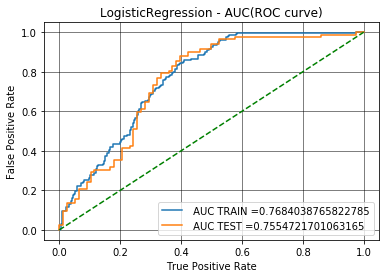

In [70]:
from sklearn.metrics import roc_curve, auc

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("LogisticRegression - AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# OBSERVATION:

Observation:
    AUC Test curve is built just fine, almost close to the AUC train, curve is having characteristics of slow curvature, which indicates, a better AUC curve, and a good model builing.

# SAVING MODEL:

In [71]:
import joblib
joblib.dump(lg_f, 'Vaibhav_Loan_Prediction_Project_Model.pkl')

['Vaibhav_Loan_Prediction_Project_Model.pkl']

# RELOADING MODEL:

In [72]:
#Reloading the model and predicting the dataset.
Loan_Prediction_Project_Model = joblib.load('Vaibhav_Loan_Prediction_Project_Model.pkl')
Loan_Prediction_Project_Model.predict(x_train)

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,

CONCUSION:

    Our model is very well performing with an accuracy score of 72.5 % accuracy.

# THANK YOU